# **Import Data**

In [2]:
!kaggle competitions download -c data-analytics-competition-find-it-2024

data-analytics-competition-find-it-2024.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#import zipfile module
from zipfile import ZipFile

with ZipFile('data-analytics-competition-find-it-2024.zip', 'r') as f:
    #extract in current directory
    f.extractall()

# **Libraries**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from scipy import stats

# **Data Loading**

In [29]:
df_train = pd.read_csv("train_features.csv")
df_train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30


**Insight :** Terdapat 3817 baris dan 16 kolom/fitur pada data train

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

**Insight :** 
1. Dengan jumlah baris 3817 pada data train, semua memiliki missing value terkecuali fitur tahun_kelahiran
2. Fitur tanggal_menjadi_anggota seharusnya memiliki tipe data datetime

In [7]:
df_train.describe()

,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan
count,3817.000000,3.627000e+03,3627.000000,3613.000000,3645.000000,3636.000000,3.639000e+03,3624.000000,3603.000000,3639.000000,3652.000000,3648.000000,3621.000000
mean,1967.823946,1.144832e+08,0.293080,0.353723,47.231550,59804.239824,4.385748e+05,81428.997792,63377.970580,2.125584,4.436473,5.767818,0.004971
std,11.768131,4.346042e+07,0.473063,0.493014,27.068512,74024.976109,5.120427e+05,99976.226855,79435.457282,2.100133,3.002522,3.210738,0.070340
min,1899.000000,5.073000e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,8.112512e+07,0.000000,0.000000,25.000000,7907.000000,4.947950e+04,10115.000000,7947.000000,0.000000,2.000000,3.000000,0.000000
50%,1968.000000,1.156214e+08,0.000000,0.000000,47.000000,26456.000000,2.219930e+05,36054.500000,27795.000000,2.000000,4.000000,5.000000,0.000000
75%,1976.000000,1.504960e+08,1.000000,1.000000,69.000000,86162.000000,6.863555e+05,121380.000000,89502.500000,3.000000,7.000000,8.000000,0.000000
max,2000.000000,3.328840e+08,2.000000,2.000000,128.000000,396508.000000,3.489675e+06,621600.000000,542164.000000,20.000000,30.000000,17.000000,1.000000


**Insight :** 
1. Beberapa fitur memiliki kemungkinan distribusi normal dikarenakan memiliki perbedaan nilai yang tidak terlalu jauh
2. Fitur fitur belanja yang mengenai harga kemungkinan tinggi memiliki outlier dan distribusinya skew
3. Perlu dilakukan scaling dikarenakan beberpa fitur memiliki perbedaan nilai yang tinggi

In [8]:
df_train.duplicated().sum()

0

In [9]:
y_train = pd.read_csv("train_labels.csv")
y_train

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4
...,...
3812,5
3813,1
3814,0
3815,0


# **EDA**

1. Bagaimana missing value terjadi?
2. Bagaimana distribusi data masing masing fitur?
3. Apakah terdapat outlier?
4. Apakah datanya balance?

## 1. Bagaimana missing value terjadi?

### pendidikan

In [66]:
ms_1 = df_train[df_train['pendidikan'].isna()]
ms_1

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
108,1982,NaN,Menikah,34735069.0,1.0,0.0,66.0,19423.0,16366.0,30862.0,21553.0,3.0,3.0,1.0,0.0,NaN
120,1963,NaN,Sendiri,77222296.0,1.0,0.0,44.0,17793.0,159679.0,46889.0,31245.0,4.0,3.0,5.0,0.0,NaN
210,1973,NaN,Menikah,80923000.0,1.0,1.0,96.0,6069.0,24276.0,0.0,NaN,2.0,4.0,5.0,0.0,2014-05-26
253,1947,NaN,Sendiri,109106168.0,1.0,1.0,0.0,5151.0,48781.0,20668.0,3128.0,5.0,NaN,4.0,0.0,NaN
258,1963,NaN,Rencana Menikah,119591357.0,0.0,1.0,25.0,16646.0,296940.0,23610.0,39476.0,3.0,5.0,9.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3716,1974,NaN,Cerai,25169000.0,1.0,0.0,85.0,6069.0,28322.0,14161.0,32368.0,6.0,5.0,4.0,0.0,2014-01-17
3723,1973,NaN,Rencana Menikah,50022737.0,1.0,0.0,68.0,9162.0,8907.0,9383.0,12614.0,0.0,3.0,2.0,0.0,NaN
3738,1977,NaN,Sendiri,64076000.0,1.0,0.0,5.0,8092.0,8092.0,28322.0,22253.0,0.0,0.0,5.0,0.0,2014-02-28
3797,1982,NaN,Sendiri,120689156.0,0.0,0.0,74.0,NaN,350942.0,44583.0,17614.0,2.0,5.0,12.0,0.0,NaN


In [68]:
ms_1['status_pernikahan'].value_counts()

status_pernikahan
Menikah            60
Sendiri            54
Rencana Menikah    45
Cerai              15
Cerai Mati          1
Name: count, dtype: int64

### pendapatan

In [62]:
ms_1 = df_train[df_train['pendapatan'].isna()]
ms_1

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
23,1982,SMA,Rencana Menikah,NaN,1.0,0.0,54.0,8742.0,26206.0,4231.0,836.0,3.0,2.0,2.0,0.0,NaN
53,1975,Doktor,Menikah,NaN,0.0,0.0,65.0,180047.0,1488928.0,145656.0,105196.0,1.0,1.0,7.0,0.0,NaN
116,1957,SMA,Rencana Menikah,NaN,0.0,1.0,30.0,15143.0,61788.0,4104.0,0.0,4.0,5.0,8.0,0.0,NaN
135,1976,Sarjana,Menikah,NaN,0.0,NaN,66.0,115311.0,1145018.0,226576.0,260967.0,2.0,6.0,7.0,0.0,2014-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,1959,Doktor,Rencana Menikah,NaN,1.0,1.0,19.0,7985.0,33007.0,958.0,0.0,4.0,2.0,1.0,NaN,NaN
3747,1968,Sarjana,Sendiri,NaN,0.0,0.0,25.0,34958.0,906989.0,147607.0,66475.0,1.0,5.0,8.0,0.0,NaN
3766,1986,Magister,Cerai,NaN,0.0,0.0,38.0,10569.0,10478.0,10115.0,7728.0,2.0,3.0,1.0,0.0,NaN
3803,1969,Sarjana,Menikah,NaN,1.0,0.0,16.0,77055.0,362195.0,31759.0,29808.0,1.0,5.0,11.0,0.0,NaN


Missing value pada fitur `pendapatan` akan diimputasi dengan mean pada masing masing pendidikan

pendapatan
58555000.0     2
98033000.0     2
100016000.0    2
102971000.0    2
147845000.0    2
              ..
75153084.0     1
43279588.0     1
263538206.0    1
112547078.0    1
130512000.0    1
Name: count, Length: 3622, dtype: int64

In [63]:
ms_1['pendidikan'].value_counts()

pendidikan
Sarjana     90
Magister    47
Doktor      19
SMA         17
SMP          6
Name: count, dtype: int64

### jumlah anak remaja

In [58]:
ms_1 = df_train[df_train['jumlah_anak_remaja'].isna()]
ms_1

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
6,1963,Magister,Sendiri,75313000.0,2.0,NaN,96.0,0.0,14161.0,8092.0,2023.0,1.0,4.0,5.0,0.0,2013-05-03
9,1975,Sarjana,Menikah,37567504.0,1.0,NaN,67.0,19061.0,28067.0,22223.0,14146.0,3.0,2.0,1.0,0.0,NaN
12,1957,Sarjana,Sendiri,152418000.0,0.0,NaN,5.0,149702.0,337841.0,93058.0,72828.0,3.0,10.0,2.0,0.0,2013-11-21
21,1965,Sarjana,Menikah,138197975.0,0.0,NaN,84.0,40357.0,214915.0,40670.0,43342.0,4.0,6.0,8.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,1975,Magister,Rencana Menikah,72537110.0,1.0,NaN,27.0,26465.0,43570.0,6555.0,755.0,2.0,2.0,4.0,0.0,NaN
3745,1975,SMA,Sendiri,51559463.0,1.0,NaN,24.0,12493.0,25109.0,33815.0,22007.0,1.0,2.0,NaN,0.0,NaN
3771,1948,Magister,Rencana Menikah,198018607.0,0.0,NaN,58.0,70474.0,1440714.0,155617.0,88035.0,0.0,6.0,7.0,0.0,NaN
3773,1975,SMP,Rencana Menikah,23664655.0,1.0,NaN,4.0,NaN,NaN,11259.0,24113.0,1.0,1.0,4.0,0.0,NaN


In [56]:
print(df_train[df_train['status_pernikahan'] == "Menikah"]['jumlah_anak_remaja'].value_counts())
print(df_train[df_train['status_pernikahan'] == "Menikah"]['jumlah_anak_remaja'].mean())
print(df_train[df_train['status_pernikahan'] == "Menikah"]['jumlah_anak_remaja'].mode())
print(df_train[df_train['status_pernikahan'] == "Menikah"]['jumlah_anak_remaja'].median())

jumlah_anak_remaja
0.0    641
1.0    397
2.0     10
Name: count, dtype: int64
0.3979007633587786
0    0.0
Name: jumlah_anak_remaja, dtype: float64
0.0


In [59]:
print(df_train[df_train['status_pernikahan'] == "Cerai"]['jumlah_anak_remaja'].value_counts())
print(df_train[df_train['status_pernikahan'] == "Cerai"]['jumlah_anak_remaja'].mean())
print(df_train[df_train['status_pernikahan'] == "Cerai"]['jumlah_anak_remaja'].mode())
print(df_train[df_train['status_pernikahan'] == "Cerai"]['jumlah_anak_remaja'].median())

jumlah_anak_remaja
0.0    110
1.0     83
2.0      3
Name: count, dtype: int64
0.45408163265306123
0    0.0
Name: jumlah_anak_remaja, dtype: float64
0.0


In [60]:
print(df_train[df_train['status_pernikahan'] == "Cerai Mati"]['jumlah_anak_remaja'].value_counts())
print(df_train[df_train['status_pernikahan'] == "Cerai Mati"]['jumlah_anak_remaja'].mean())
print(df_train[df_train['status_pernikahan'] == "Cerai Mati"]['jumlah_anak_remaja'].mode())
print(df_train[df_train['status_pernikahan'] == "Cerai Mati"]['jumlah_anak_remaja'].median())

jumlah_anak_remaja
0.0    24
1.0    14
Name: count, dtype: int64
0.3684210526315789
0    0.0
Name: jumlah_anak_remaja, dtype: float64
0.0


**Insight :** Missing value pada fitur `jumlah_anak_remaja` akan diimputasi dengan 0 dikarenakan memiliki kemungkinan orang yang tidak mengisi tidak memiliki anak remaja

### jumlah anak balita

In [40]:
ms_1 = df_train[df_train['jumlah_anak_balita'].isna()]
ms_1

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
13,1979,SMP,Menikah,14967000.0,NaN,0.0,65.0,34391.0,30345.0,32368.0,0.0,0.0,5.0,2.0,0.0,2012-11-14
17,1973,Sarjana,Rencana Menikah,119766595.0,NaN,1.0,16.0,20230.0,181594.0,10650.0,51288.0,0.0,7.0,8.0,0.0,NaN
43,1954,Magister,Rencana Menikah,105339251.0,NaN,1.0,58.0,4046.0,154472.0,15851.0,442.0,7.0,9.0,4.0,0.0,NaN
52,1956,Magister,Rencana Menikah,190785436.0,NaN,0.0,59.0,77286.0,1082787.0,112601.0,19302.0,0.0,9.0,6.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,1990,SMA,Menikah,125535217.0,NaN,2.0,41.0,35834.0,NaN,NaN,103129.0,0.0,0.0,4.0,0.0,NaN
3783,1966,Magister,Rencana Menikah,65730000.0,NaN,1.0,10.0,0.0,52598.0,NaN,0.0,2.0,4.0,NaN,0.0,2012-09-07
3792,1956,Doktor,Rencana Menikah,136934000.0,NaN,2.0,86.0,76874.0,NaN,24276.0,0.0,5.0,13.0,3.0,0.0,2013-03-07
3795,1987,SMA,Menikah,165167035.0,NaN,0.0,20.0,NaN,674183.0,54447.0,53628.0,2.0,3.0,8.0,0.0,NaN


In [41]:
ms_1['status_pernikahan'].value_counts()

status_pernikahan
Menikah            63
Rencana Menikah    51
Sendiri            48
Cerai              11
Cerai Mati          2
Name: count, dtype: int64

In [52]:
print(df_train[df_train['status_pernikahan'] == "Cerai"]['jumlah_anak_balita'].value_counts())
print(df_train[df_train['status_pernikahan'] == "Cerai"]['jumlah_anak_balita'].mean())
print(df_train[df_train['status_pernikahan'] == "Cerai"]['jumlah_anak_balita'].mode())
print(df_train[df_train['status_pernikahan'] == "Cerai"]['jumlah_anak_balita'].median())

jumlah_anak_balita
0.0    152
1.0     49
2.0      2
Name: count, dtype: int64
0.26108374384236455
0    0.0
Name: jumlah_anak_balita, dtype: float64
0.0


In [53]:
print(df_train[df_train['status_pernikahan'] == "Cerai Mati"]['jumlah_anak_balita'].value_counts())
print(df_train[df_train['status_pernikahan'] == "Cerai Mati"]['jumlah_anak_balita'].mean())
print(df_train[df_train['status_pernikahan'] == "Cerai Mati"]['jumlah_anak_balita'].mode())
print(df_train[df_train['status_pernikahan'] == "Cerai Mati"]['jumlah_anak_balita'].median())

jumlah_anak_balita
0.0    28
1.0    10
Name: count, dtype: int64
0.2631578947368421
0    0.0
Name: jumlah_anak_balita, dtype: float64
0.0


In [47]:
print(df_train[df_train['status_pernikahan'] == "Menikah"]['jumlah_anak_balita'].value_counts())
print(df_train[df_train['status_pernikahan'] == "Menikah"]['jumlah_anak_balita'].mean())
print(df_train[df_train['status_pernikahan'] == "Menikah"]['jumlah_anak_balita'].mode())
print(df_train[df_train['status_pernikahan'] == "Menikah"]['jumlah_anak_balita'].median())

jumlah_anak_balita
0.0    726
1.0    310
2.0     15
Name: count, dtype: int64
0.3235014272121789
0    0.0
Name: jumlah_anak_balita, dtype: float64
0.0


**Insight :** Missing value pada fitur `jumlah_anak_balita` akan diimputasi dengan 0

## 2. Bagaimana distribusi data masing masing fitur?

### Numeric

In [15]:
fitur_number = df_train.select_dtypes(include=['int', 'float']).columns # Mengambil fitur fitur yang bertipe data integer dan float

highly_skewed = []
moderately_skewed = []
normal_skewed = []

# Perulangan untuk mengecek skewnes masing masing fitur 
for i in df_train[fitur_number].columns : 
    nilai_skew = df_train[i].skew() # Hitung skewness
    if nilai_skew < -1 or nilai_skew > 1 : # Jika skewnessnya lebih besar dari 1 atau lebih kecil -1
        highly_skewed.append(i)
    elif (nilai_skew >= -1 and nilai_skew <= -0.5) or (nilai_skew <= 1 and nilai_skew >= 0.5) :  # Jika skewnessnya di antara -1 dan -0.5 atau di antara 1 dan 0.5
        moderately_skewed.append(i)
    else : # Jika skewnessnya tidak memenuhi dua kondisi di atas
        normal_skewed.append(i)

In [16]:
for i in highly_skewed :
    print(i, end=", ")

jumlah_anak_balita, belanja_buah, belanja_daging, belanja_ikan, belanja_kue, pembelian_diskon, keluhan, 

In [17]:
for i in moderately_skewed :
    print(i, end=", ")

jumlah_anak_remaja, pembelian_web, 

In [18]:
for i in normal_skewed :
    print(i, end=", ")

tahun_kelahiran, pendapatan, terakhir_belanja, pembelian_toko, 

**Insight :** Sesuai dengan yang sudah ditemukan pada data loading beberapa fitur memiliki distribusi normal dan distribusi skew

### Categorical

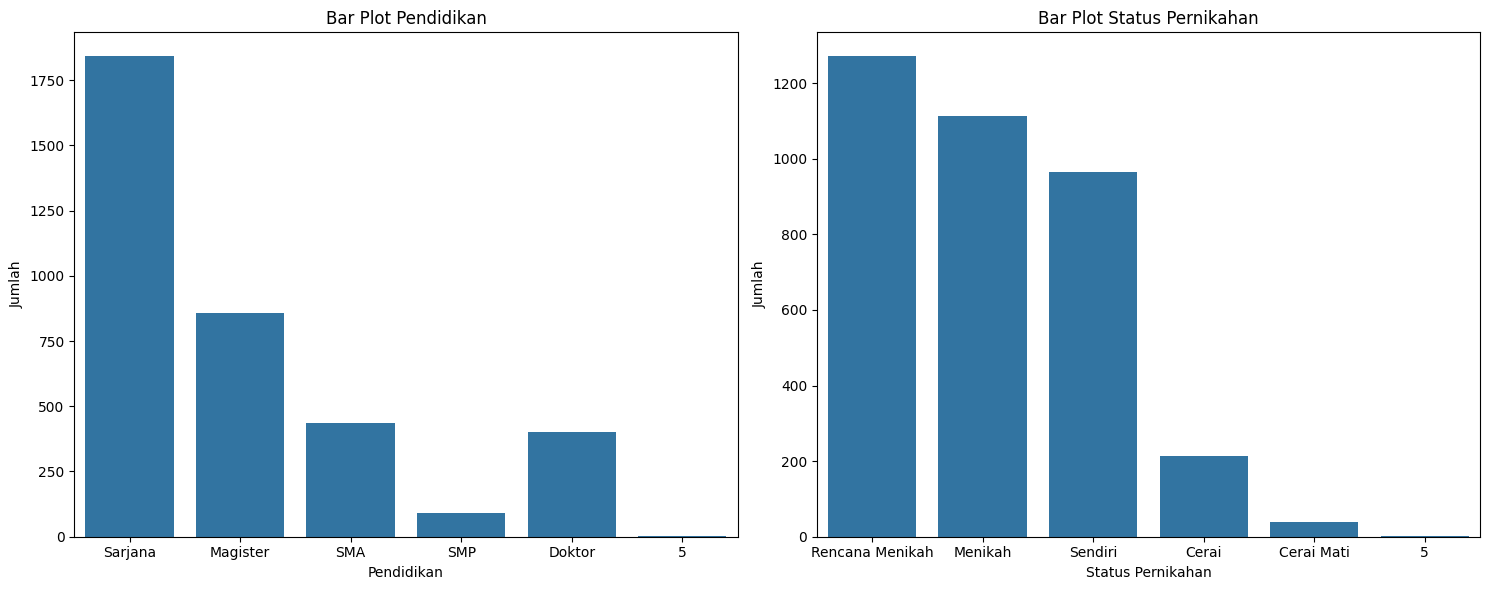

In [19]:
# Membuat dua bar plot terpisah
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot untuk pendidikan
sns.countplot(data=df_train, x='pendidikan', ax=axes[0])
axes[0].set_title('Bar Plot Pendidikan')
axes[0].set_xlabel('Pendidikan')
axes[0].set_ylabel('Jumlah')

# Bar plot untuk status pernikahan
sns.countplot(data=df_train, x='status_pernikahan', ax=axes[1])
axes[1].set_title('Bar Plot Status Pernikahan')
axes[1].set_xlabel('Status Pernikahan')
axes[1].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

**Insight :** 
1. Tiap kategori memiliki perbedaan jumlah data yang cukup tinggi
2. Pada pendidikan maupun status_pernikahan terdapat kategori `5` yang tidak diketahui maksudnya, sehingga perlu dilakukan drop

## 3. Apakah terdapat outlier?

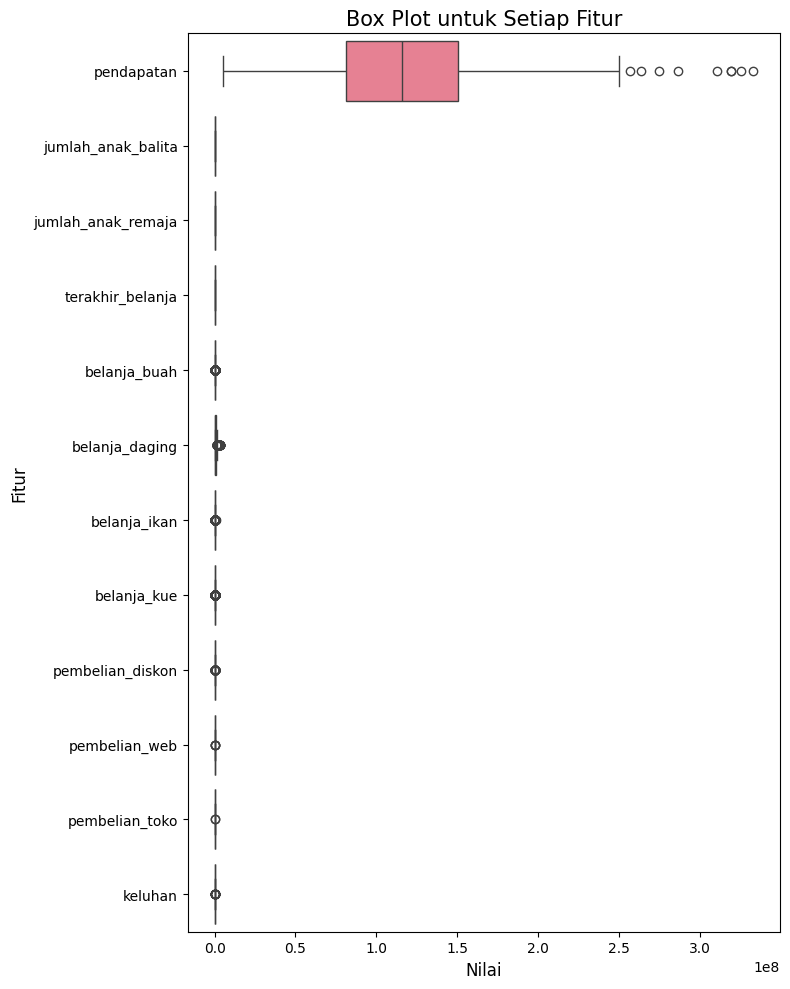

In [20]:
kolom = df_train.columns

# Set up figure and axes
fig, axes = plt.subplots(figsize=(8, 10))

# Plot the box plot
sns.boxplot(data=df_train.drop(columns=kolom[0]), orient='h', ax=axes)

# Set title and labels
axes.set_title('Box Plot untuk Setiap Fitur', fontsize=15, loc='center')
axes.set_ylabel('Fitur', fontsize=12)
axes.set_xlabel('Nilai', fontsize=12)

plt.tight_layout()
plt.show()

**Insight :** 
1. Hanya fitur `jumlah_anak_balita`,`jumlah_anak_remaja`, dan `terakhir_belanja` yang tidak memiliki outlier
2. Outlier yang terjadi memiliki kemungkinan terjadi secara alami sehingga tidak perlu dilakukan trimming

## 4. Apakah datanya balance?

In [22]:
y_train.value_counts()

jumlah_promosi
0                 983
5                 557
1                 515
4                 515
3                 472
2                 389
6                 386
Name: count, dtype: int64

**Insight :** Perbedaan nilainya tidak terlalu jauh, memungkinkan untuk dilakukan balancing data dengan metode SMOTE dan seimbangkan di nilai tengah

# **Feature Engineering**

## Missing Value Handling

In [23]:
df_train.dropna(inplace=True)

In [ ]:
# Menyamakan indeks pada data y dengan data X yang sudah di drop outlier
y_train_MV = df_label_train.loc[df_train.index]

## Outlier Handling

In [ ]:
skewed_column = highly_skewed+moderately_skewed
skewed_column.remove("keluhan") # memiliki variasa rendah



# Metode Capping untuk Distribusi Skew
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=skewed_column,
                            missing_values='ignore')

df_test_oh = df_test.copy()
df_test_oh.drop(columns="ID", inplace=True)

# Fit & Transforming X_train 
df_train_capped = winsorizer_skewed.fit_transform(df_train)
df_test_capped = winsorizer_skewed.transform(df_test_oh)

In [ ]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


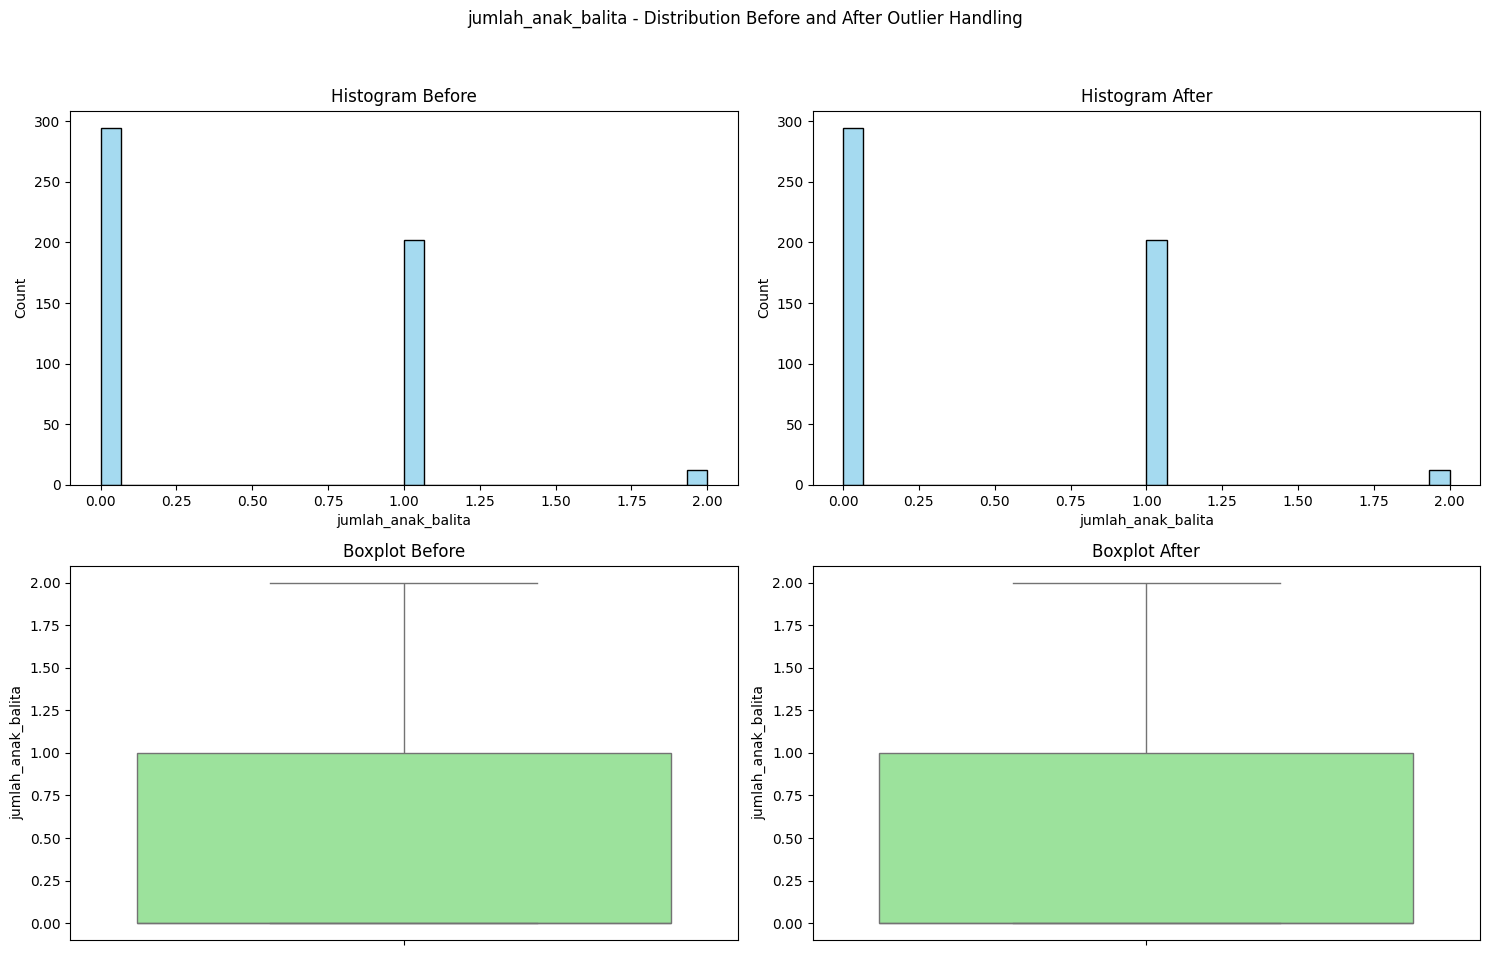

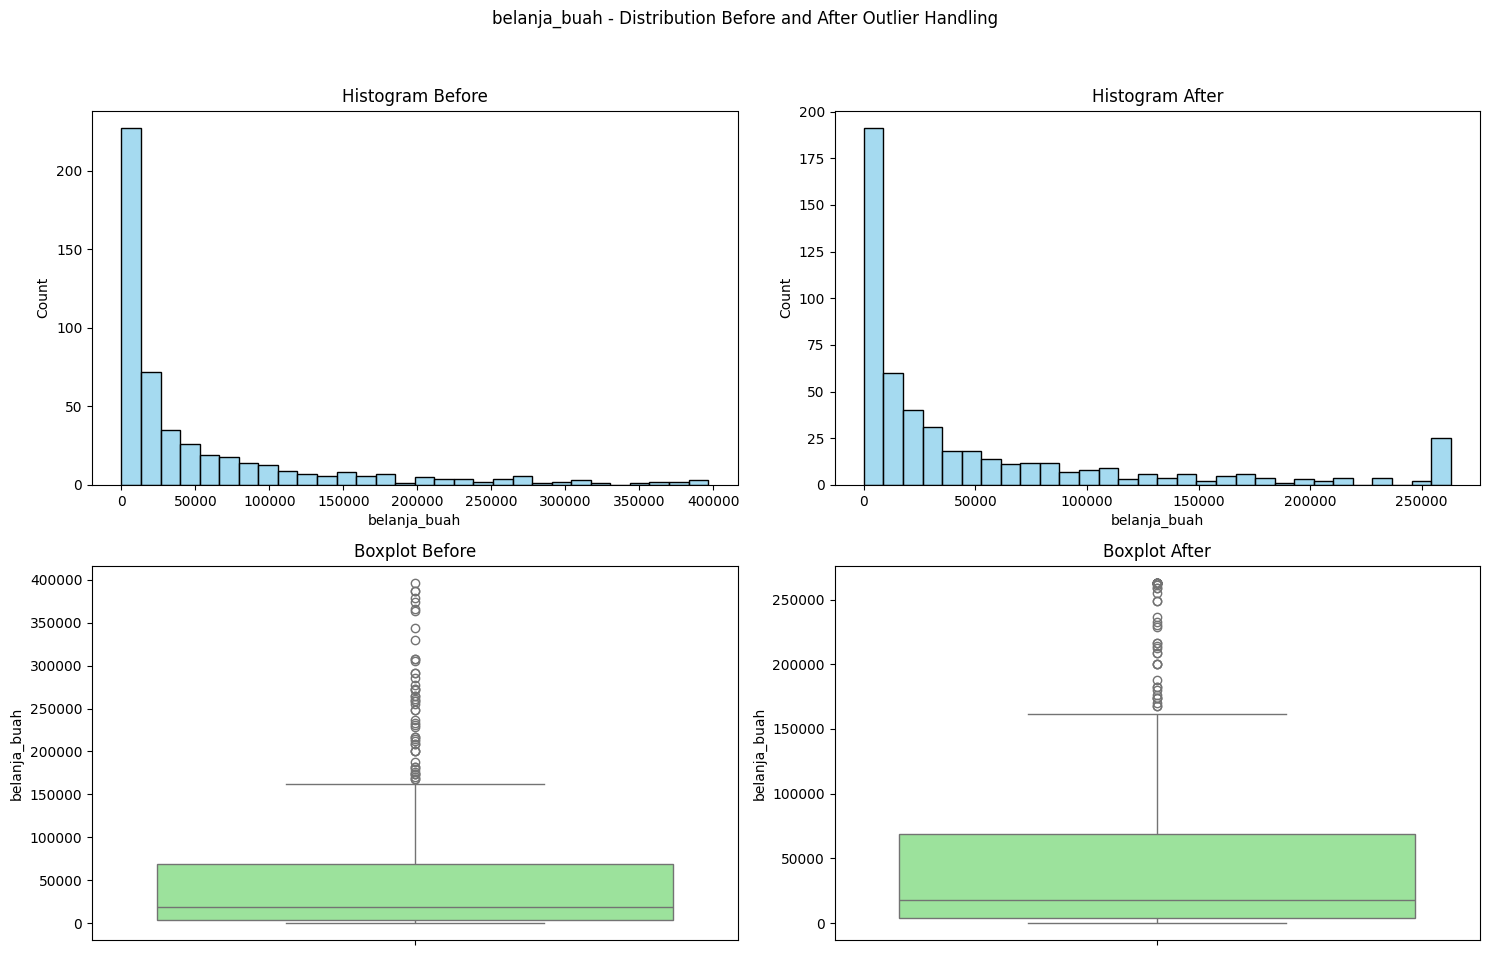

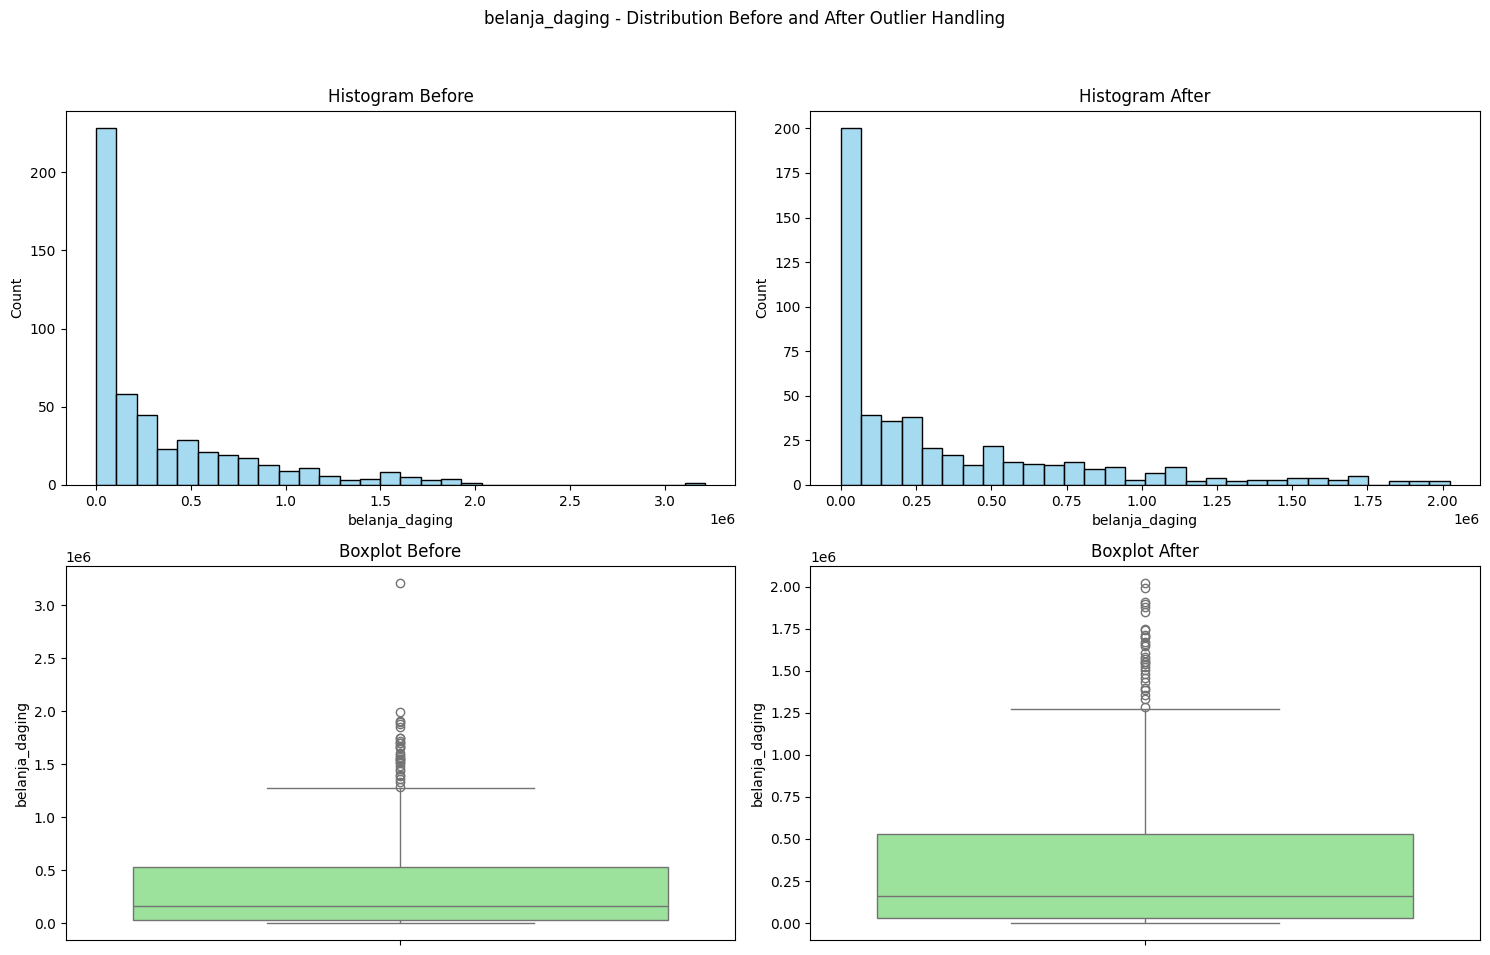

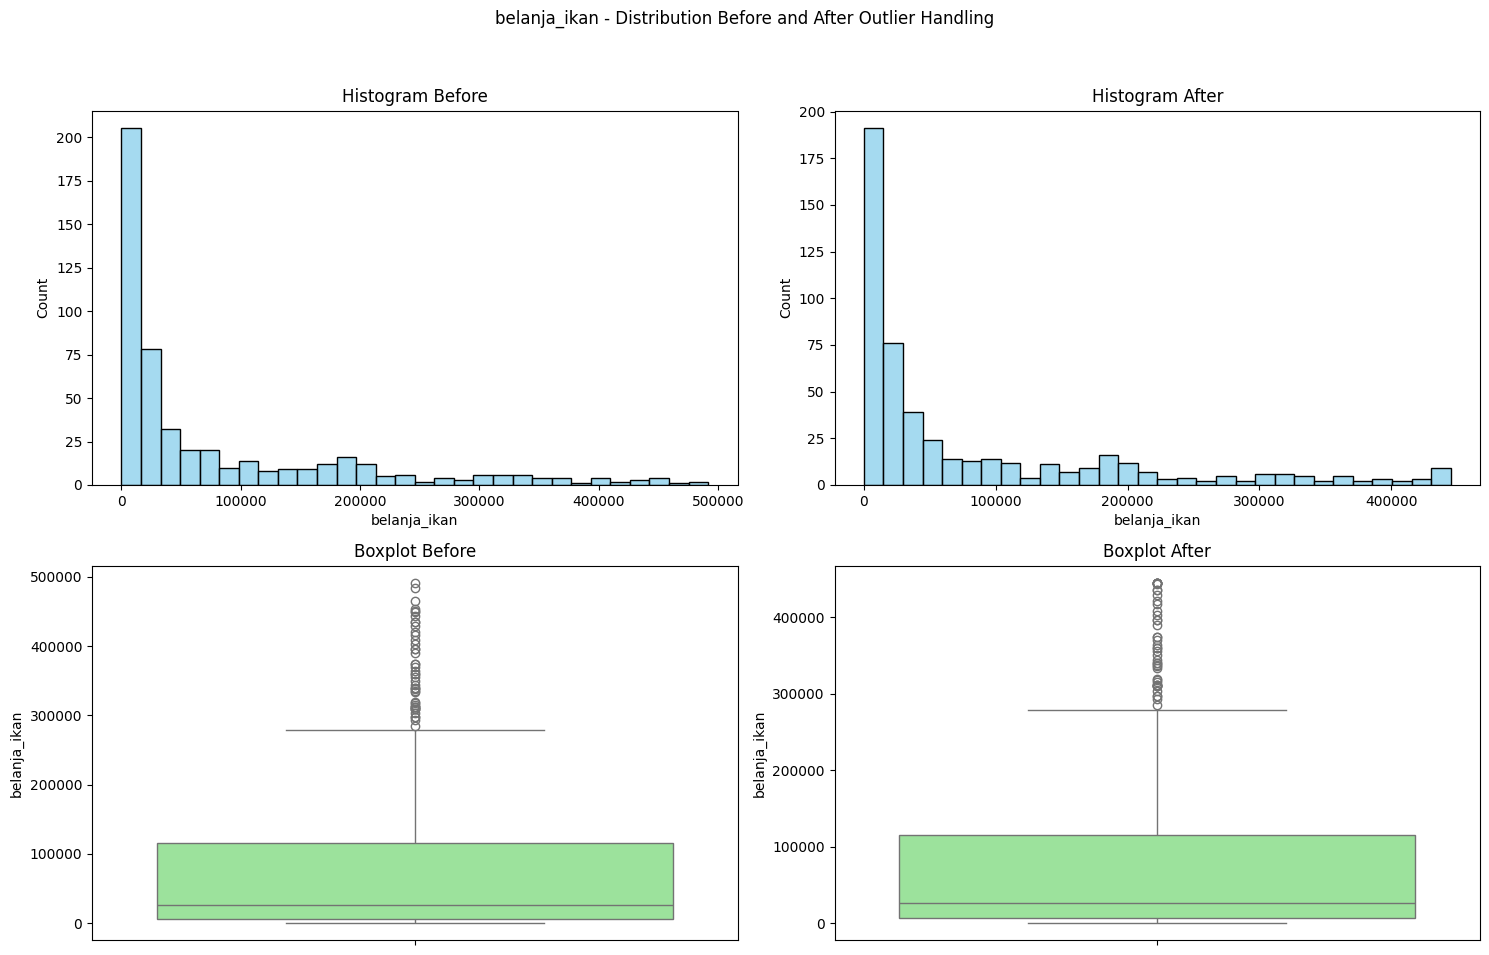

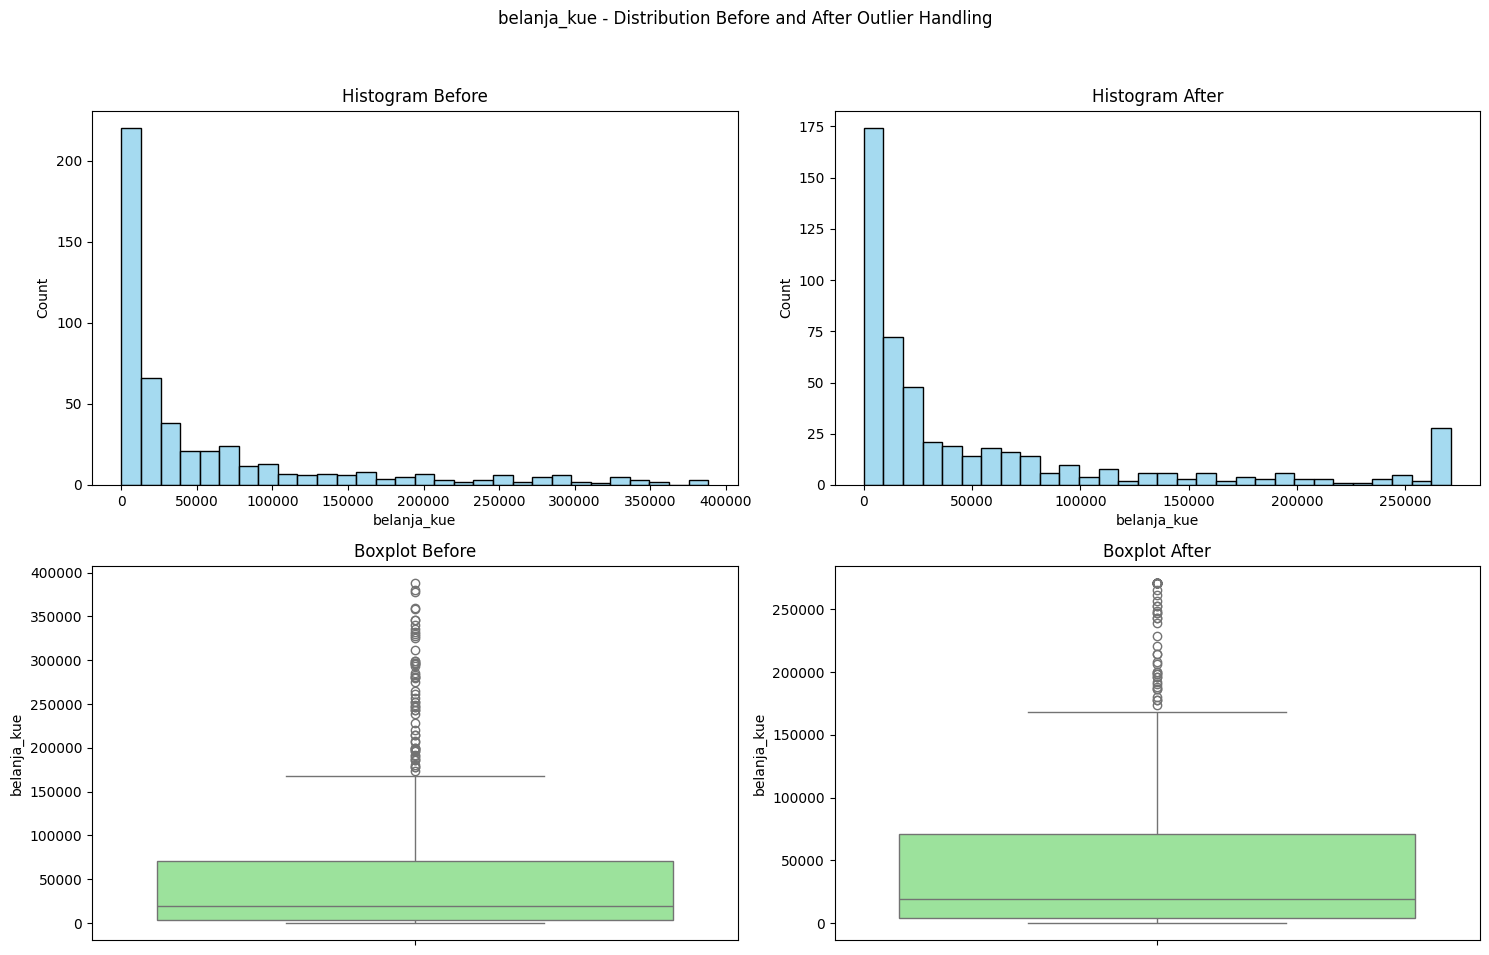

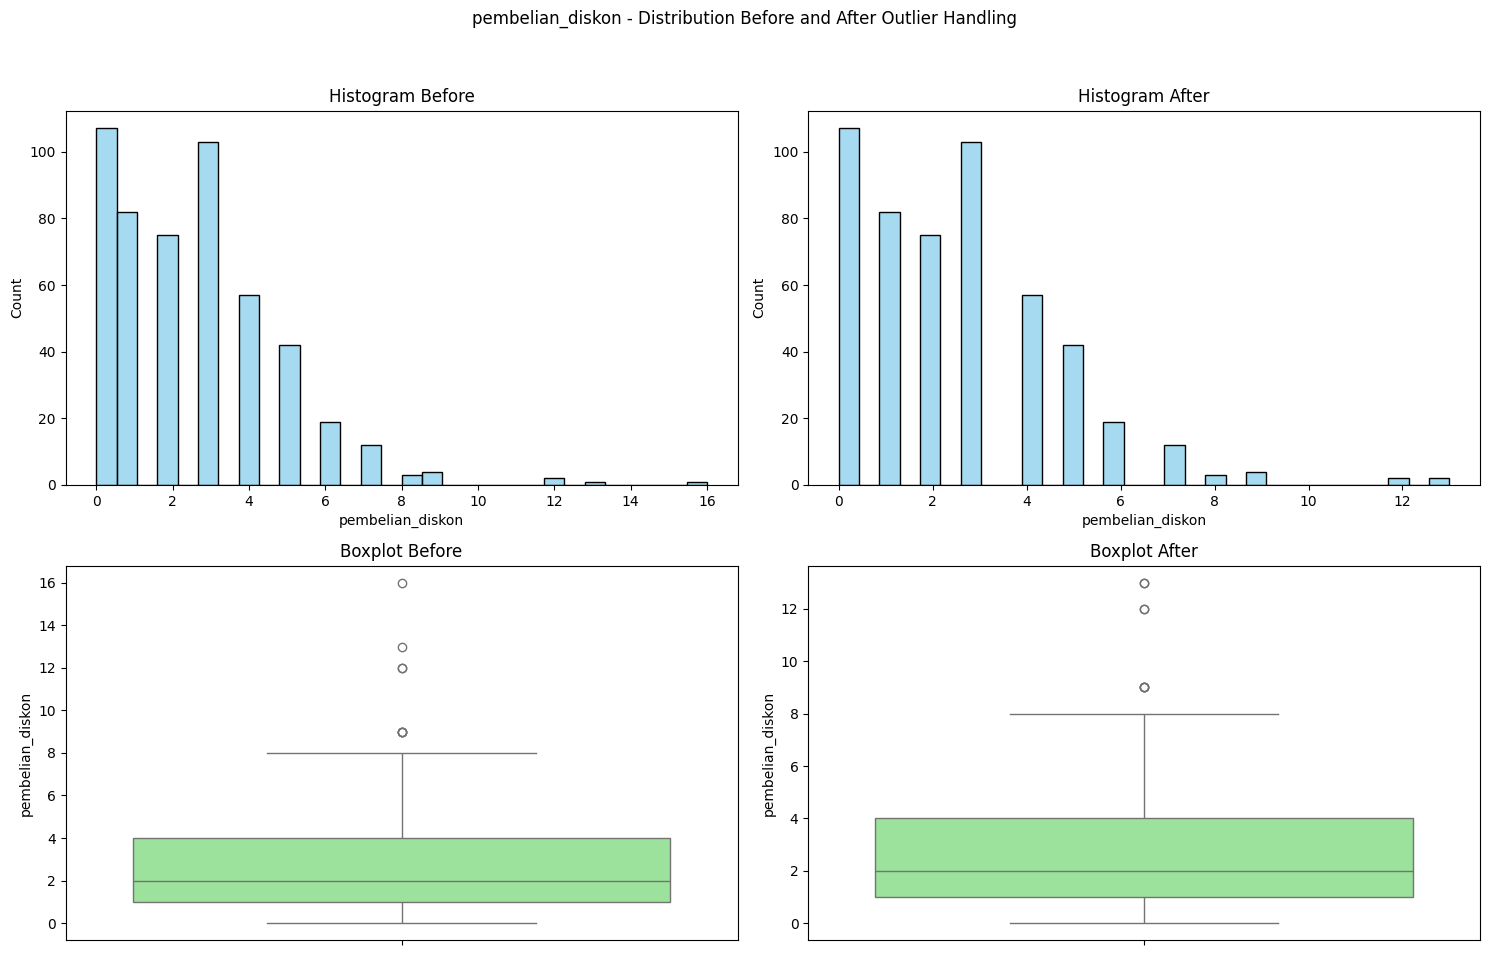

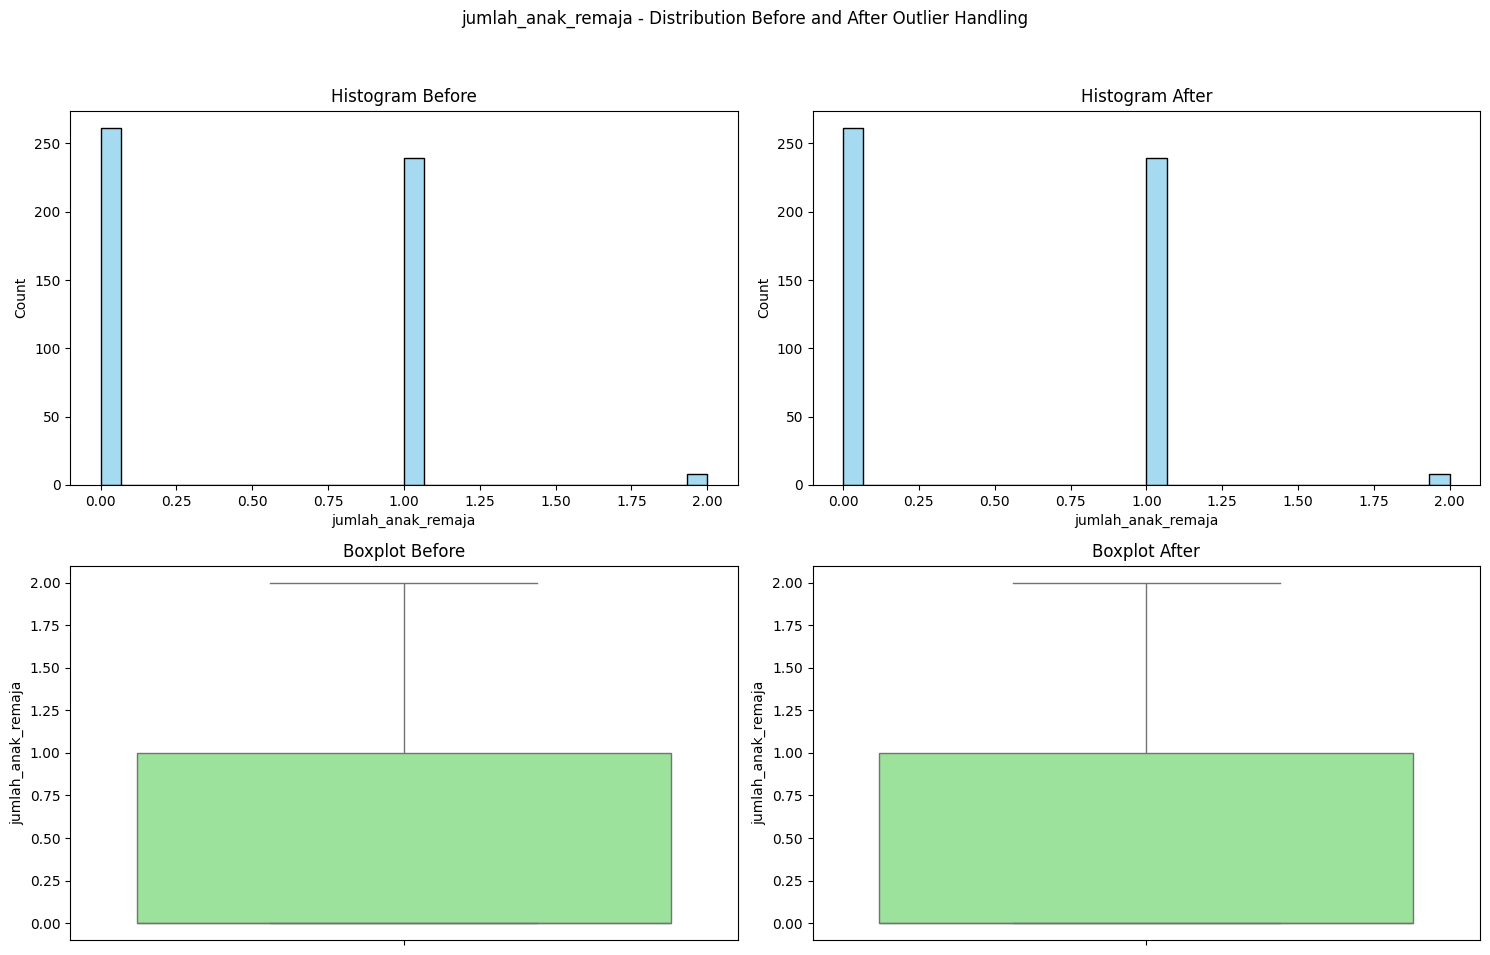

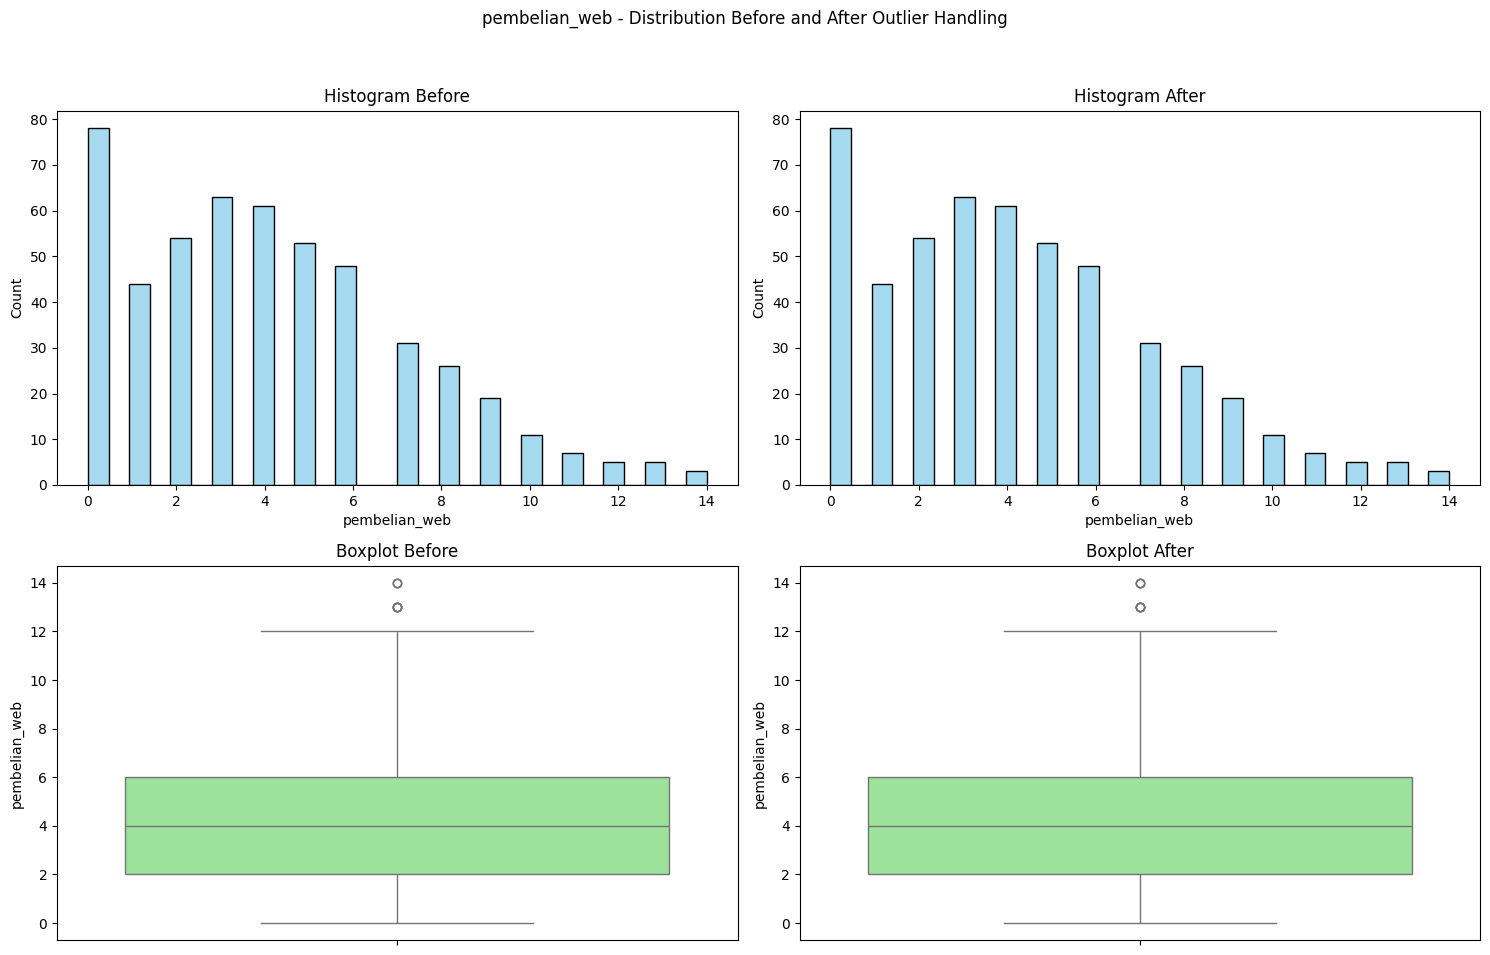

In [ ]:
for col in skewed_column:
    outlier_handling_plot_comparison(df_train, df_train_capped, col)

Beberapa masih memiliki outlier sehingga untuk scaling dan feature selection perlu disesuaikan

## Feature Selection

In [ ]:
df_train_capped

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
18,1969,Sarjana,Menikah,51837000.0,1.0,0.0,0.0,6069.0,10115.0,10115.0,10115.0,0.0,0.0,2.0,0.0,2013-06-23
25,1971,Sarjana,Menikah,43178000.0,1.0,0.0,26.0,0.0,42483.0,16184.0,0.0,2.0,1.0,3.0,0.0,2012-10-06
28,1957,Sarjana,Rencana Menikah,82594000.0,0.0,1.0,17.0,12138.0,42483.0,30345.0,8092.0,2.0,5.0,6.0,0.0,2013-02-11
40,1976,SMA,Sendiri,83611000.0,1.0,1.0,29.0,10115.0,26299.0,36414.0,16184.0,4.0,4.0,1.0,0.0,2012-11-10
48,1968,Doktor,Rencana Menikah,83987000.0,2.0,1.0,41.0,2023.0,14161.0,0.0,0.0,6.0,6.0,5.0,0.0,2013-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,1962,Magister,Menikah,146263000.0,0.0,1.0,0.0,12138.0,499681.0,0.0,56644.0,0.0,4.0,6.0,0.0,2012-12-17
3777,1978,Sarjana,Menikah,86801000.0,1.0,1.0,48.0,4046.0,34391.0,6069.0,22253.0,1.0,3.0,3.0,0.0,2012-12-22
3790,1981,Sarjana,Menikah,139090000.0,0.0,0.0,87.0,141610.0,758625.0,192185.0,271082.0,0.0,5.0,8.0,0.0,2012-10-31
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07


In [ ]:
p_values = []
interpretation = []
cols = []

col_cat = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents','Credit_History']
# Menggunakan pointbiserialr untuk menghitung korelasi
for col in col_cat:
    contingency_table = pd.crosstab(X_train_selected[col],y_train_missing_drop)
    res = stats.chi2_contingency(contingency_table)
    
    p_values.append(res.pvalue)
    cols.append(col)

    if res.pvalue < 0.05:
        interpretation.append('Significant Correlation')
    else:
        interpretation.append('No Significant Correlation')

# Create DataFrame with all numeric values
correlation_df = pd.DataFrame({
    'Column Name': cols,
    'P-value': p_values
})

# Add 'Interpretation' column with interpretation values
correlation_df['Interpretation'] = interpretation

correlation_df 

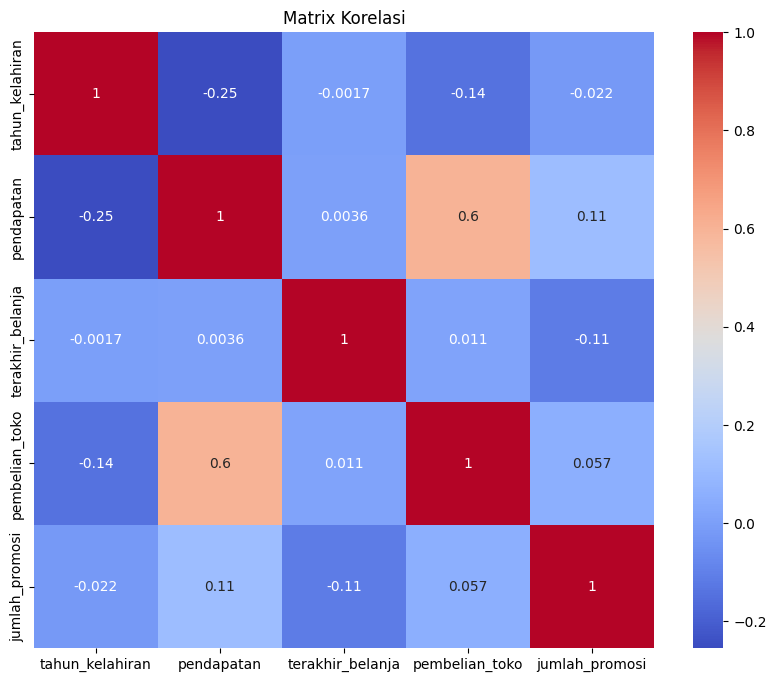

In [ ]:
normal_skewed.append("jumlah_promosi")
df_corr_train = df_train_capped.copy()
df_corr_train['jumlah_promosi'] = y_train_MV

# Matrix Korelasi
correlation_matrix = df_corr_train[normal_skewed].corr(method="pearson")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrix Korelasi")
plt.show()

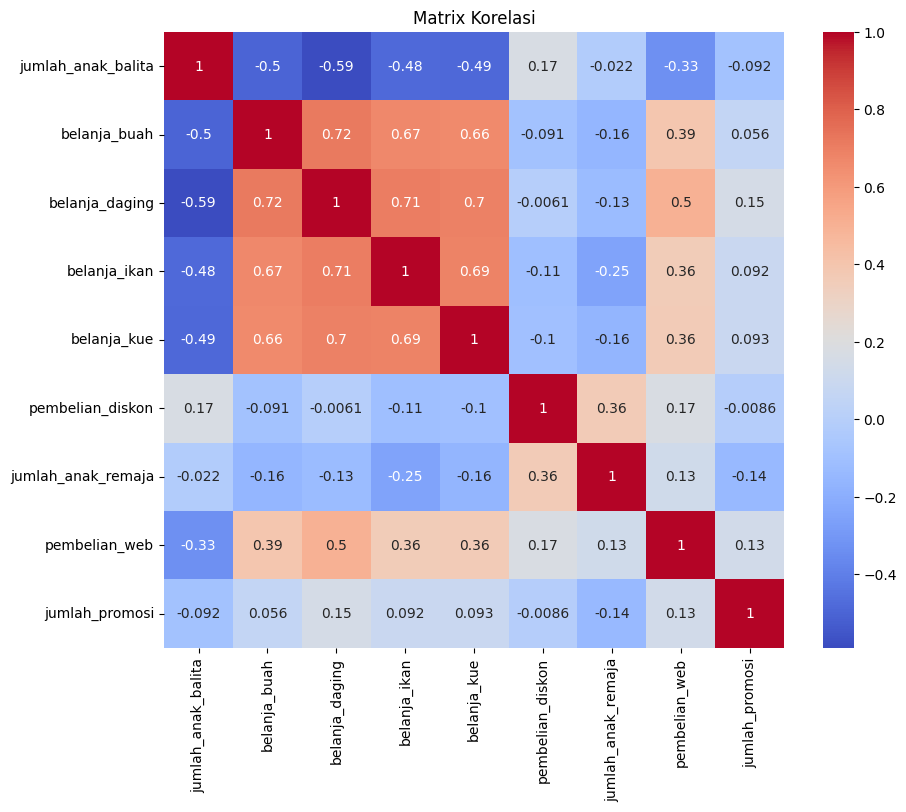

In [ ]:
skewed_column.append("jumlah_promosi")

# Matrix Korelasi
correlation_matrix = df_corr_train[skewed_column].corr(method="spearman")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrix Korelasi")
plt.show()

## Encoding

## Scaling

# **Balancing Dataset**

# **Modelling**

# **Model Evaluation**